## 数据特征分析

本内容包含
```
1.分布分析
2.对比分析
3.统计分析
4.帕累托分析
5.正态性检验
6.相关性分析
```
[本内容练习来源](https://www.kesci.com/home/workspace/project?tab=public)


In [6]:
## 基础依赖包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# 中文乱码的处理
plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370


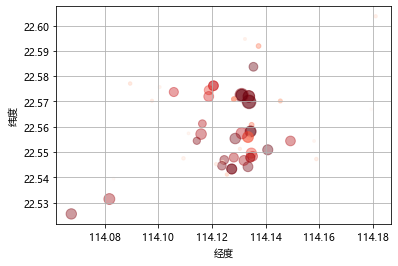

In [7]:
## 导入数据内容
data = pd.read_csv('./data/second_hand_ house.csv')
plt.scatter(data['经度'],data['纬度'],  # 按照经纬度显示
            s = data['房屋单价']/500,  # 按照单价显示大小
            c = data['参考总价'],  # 按照总价显示颜色
            alpha = 0.4, cmap = 'Reds')  
plt.xlabel('经度')
plt.ylabel('纬度')
plt.grid()# 添加格子
data.head()

### 1 分布分析
分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

极差 / 频率分布情况 / 分组组距及组数

In [14]:
# 极差：max-min
def df_range(data,*cols):
    krange=[]
    for col in cols:
        crange=data[col].max() - data[col].min()
        krange.append(crange)
    return krange
key1 = '参考首付'
key2 = '参考总价'
dr = df_range(data,key1,key2)
print('%s极差为 %f \n%s极差为 %f' % (key1, dr[0], key2, dr[1]))
# 求出数据对应列的极差

参考首付极差为 52.500000 
参考总价极差为 175.000000


(array([38.,  0.,  2.,  4., 11.,  9.,  8.,  0.,  1.,  2.]),
 array([ 3472. , 12648.6, 21825.2, 31001.8, 40178.4, 49355. , 58531.6,
        67708.2, 76884.8, 86061.4, 95238. ]),
 <a list of 10 Patch objects>)

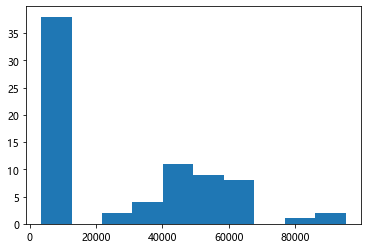

In [16]:
# 频率分布情况 - 定量字段
# ① 通过直方图直接判断分组组数

# data['房屋单价'].hist(bins=10)
plt.hist(data['房屋单价'],bins=10)
# 简单查看数据分布，确定分布组数 → 一般8-16即可
# 这里以10组为参考

In [21]:
# 频率分布情况 - 定量字段
# ② 求出分组区间
gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)  # 计算落到区间的数量，不排序
data['%s分组区间' % key2] = gcut.values
print(gcut.head(),'\n-------------------------------')
print(gcut_count,'\n-------------------------------')
# pd.cut(x, bins, right)：按照组数对x分组，且返回一个和x同样长度的分组dataframe，right → 是否右边包含，默认True
# 给源数据data添加“分组区间”列
# 通过groupby查看不同组的数据频率分布
data.groupby('房屋单价分组区间').count()

0     [3472.0, 12648.6)
1     [3472.0, 12648.6)
2     [3472.0, 12648.6)
3     [3472.0, 12648.6)
4    [40178.4, 49355.0)
Name: 房屋单价, dtype: category
Categories (10, interval[float64]): [[3472.0, 12648.6) < [12648.6, 21825.2) < [21825.2, 31001.8) < [31001.8, 40178.4) ... [58531.6, 67708.2) < [67708.2, 76884.8) < [76884.8, 86061.4) < [86061.4, 95329.766)] 
-------------------------------
[3472.0, 12648.6)       38
[12648.6, 21825.2)       0
[21825.2, 31001.8)       2
[31001.8, 40178.4)       4
[40178.4, 49355.0)      11
[49355.0, 58531.6)       9
[58531.6, 67708.2)       8
[67708.2, 76884.8)       0
[76884.8, 86061.4)       1
[86061.4, 95329.766)     2
Name: 房屋单价, dtype: int64 
-------------------------------


,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,房屋单价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[3472.0, 12648.6)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[3472.0, 12648.6)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[3472.0, 12648.6)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[3472.0, 12648.6)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[40178.4, 49355.0)"


In [28]:
# 频率分布情况 - 定量字段
# ③  求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)  # 修改频数字段名
r_zj['频率'] = r_zj / r_zj['频数'].sum()  # 计算频率
r_zj['累计频率'] = r_zj['频率'].cumsum()  # 计算累计频率
r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'], color='green',width=200)

,频数,频率,累计频率,频率%,累计频率%
"[3472.0, 12648.6)",38,0.506667,0.506667,50.67%,50.67%
"[12648.6, 21825.2)",0,0.000000,0.506667,0.00%,50.67%
"[21825.2, 31001.8)",2,0.026667,0.533333,2.67%,53.33%
"[31001.8, 40178.4)",4,0.053333,0.586667,5.33%,58.67%
"[40178.4, 49355.0)",11,0.146667,0.733333,14.67%,73.33%
"[49355.0, 58531.6)",9,0.120000,0.853333,12.00%,85.33%
"[58531.6, 67708.2)",8,0.106667,0.960000,10.67%,96.00%
"[67708.2, 76884.8)",0,0.000000,0.960000,0.00%,96.00%
"[76884.8, 86061.4)",1,0.013333,0.973333,1.33%,97.33%
"[86061.4, 95329.766)",2,0.026667,1.000000,2.67%,100.00%


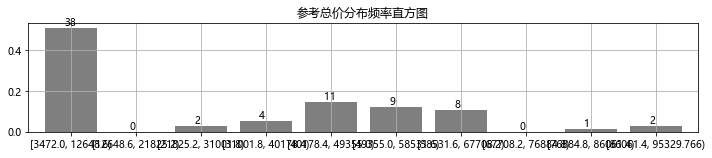

In [33]:
# 频率分布情况 - 定量字段
# ④ 绘制频率直方图
# 绘制直方图
r_zj['频率'].plot(kind = 'bar',
                 width = 0.8,
                 figsize = (12,2),
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')

# 添加频数标签
x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
#zip 返回一个元组,序列，频率，频数 （0 0.5066666666666667 38）
for i,j,k in zip(range(x),y,m):
    #标注直方图频数
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')

In [34]:
# 频率分布情况 - 定性字段
# ① 通过计数统计判断不同类别的频率
cx_g = data['朝向'].value_counts(sort=True)
print(cx_g)
# 统计频率

r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns ={cx_g.name:'频数'}, inplace = True)  # 修改频数字段名
r_cx['频率'] = r_cx / r_cx['频数'].sum()  # 计算频率
r_cx['累计频率'] = r_cx['频率'].cumsum()  # 计算累计频率
r_cx['频率%'] = r_cx['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_cx.style.bar(subset=['频率','累计频率'], color='#d65f5f',width=100)

南北    29
南     20
东      8
东南     5
北      4
西南     4
西北     3
东西     1
东北     1
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.760000,10.67%,76.00%
东南,5,0.066667,0.826667,6.67%,82.67%
北,4,0.053333,0.880000,5.33%,88.00%
西南,4,0.053333,0.933333,5.33%,93.33%
西北,3,0.040000,0.973333,4.00%,97.33%
东西,1,0.013333,0.986667,1.33%,98.67%
东北,1,0.013333,1.000000,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

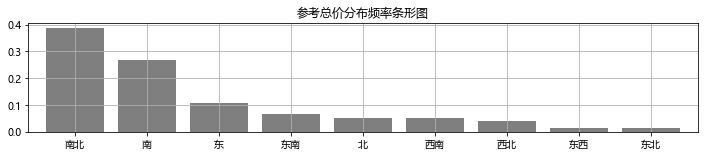

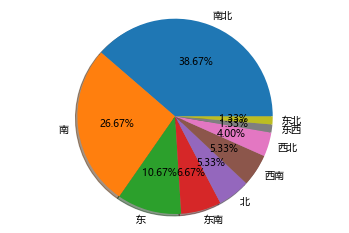

In [39]:
# 频率分布情况 - 定量字段
# ② 绘制频率直方图、饼图

plt.figure(num = 1,figsize = (12,2))
r_cx['频率'].plot(kind = 'bar',
                 width = 0.8,
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率条形图')

# 绘制饼图
plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow = True)
#    坐标轴的属性
plt.axis('equal')

### 对比分析
对比分析 → 两个互相联系的指标进行比较

绝对数比较（相减） / 相对数比较（相除）
结构分析、比例分析、空间比较分析、动态对比分析

A_sale      B_sale
2017-06-01  990.103995  867.498445
2017-06-02  659.385284  259.528859
2017-06-03  843.437366  163.549962
2017-06-04  677.371259  330.333348
2017-06-05  327.311789  872.333312


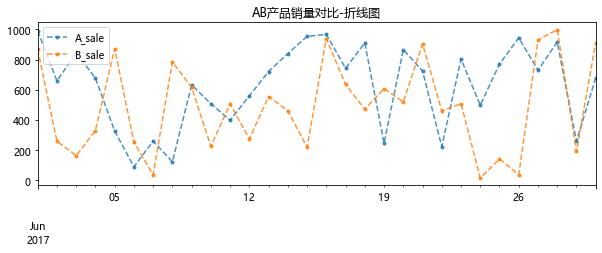

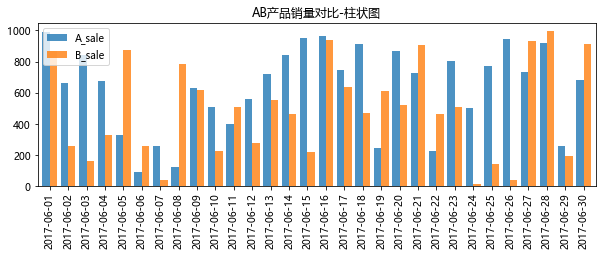

In [40]:
# 1、绝对数比较 → 相减
# 相互对比的指标在量级上不能差别过大
# （1）折线图比较
# （2）多系列柱状图比较

data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20170601','20170630'))
print(data.head())
# 创建数据 → 30天内A/B产品的日销售额

data.plot(kind='line',
       style = '--.',
       alpha = 0.8,
       figsize = (10,3),
       title = 'AB产品销量对比-折线图')
# 折线图比较

data.plot(kind = 'bar',
          width = 0.8,
          alpha = 0.8,
          figsize = (10,3),
          title = 'AB产品销量对比-柱状图')
# 多系列柱状图比较

[Text(0, 0, '2017-06-01'),
 Text(0, 0, '2017-06-07'),
 Text(0, 0, '2017-06-13'),
 Text(0, 0, '2017-06-19'),
 Text(0, 0, '2017-06-25')]

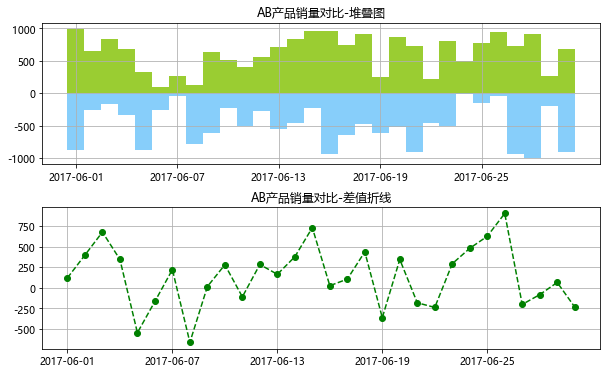

In [41]:
# （3）柱状图堆叠图+差值折线图比较
fig3 = plt.figure(figsize=(10,6))
# 创建子图及间隔设置
plt.subplots_adjust(hspace=0.3)

ax1 = fig3.add_subplot(2,1,1)  
# 创建堆叠图
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width = 1,facecolor = 'yellowgreen')
plt.bar(x,y2,width = 1,facecolor = 'lightskyblue')
plt.title('AB产品销量对比-堆叠图')
plt.grid()
#标记x轴步长选取
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])

# 创建差值折线图
ax2 = fig3.add_subplot(2,1,2)  
y3 = data['A_sale']-data['B_sale']
plt.plot(x,y3,'--go')

plt.grid()
plt.title('AB产品销量对比-差值折线')
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

A_sale      B_sale
2017-06-01   16.736320   56.382680
2017-06-02  327.568102  135.072366
2017-06-03   30.538142   92.965022
2017-06-04  947.884528  188.514814
2017-06-05  100.514858  111.189409
--------------------------
                A_sale      B_sale     A_per     B_per A_per% B_per%
2017-06-01   16.736320   56.382680  0.001269  0.015527  0.13%  1.55%
2017-06-02  327.568102  135.072366  0.024834  0.037197  2.48%  3.72%
2017-06-03   30.538142   92.965022  0.002315  0.025601  0.23%  2.56%
2017-06-04  947.884528  188.514814  0.071863  0.051914  7.19%  5.19%
2017-06-05  100.514858  111.189409  0.007620  0.030620  0.76%  3.06%


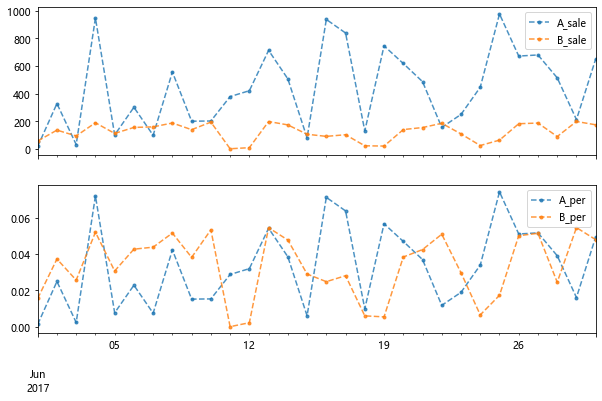

In [45]:
# 2、相对数比较 → 相除
# 有联系的指标综合计算后的对比，数值为相对数
# 结构分析、比例分析、空间比较分析、动态对比分析、计划完成度分析
# （1）结构分析
# 在分组基础上，各组总量指标与总体的总量指标对比，计算出各组数量在总量中所占比重
# 反映总体的内部结构

data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*200},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('--------------------------')
# 创建数据 → 30天内A/B产品的日销售额
# A/B产品销售额量级不同

data['A_per'] = data['A_sale'] / data['A_sale'].sum()
data['B_per'] = data['B_sale'] / data['B_sale'].sum()
# 计算出每天的营收占比

data['A_per%'] = data['A_per'].apply(lambda x: '%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x: '%.2f%%' % (x*100))
# 转换为百分数
print(data.head())
# fig, ax = plt.subplots(2,1),其中参数2和1分别代表子图的行数和列数，一共有 2x1 个子图像。
fig,axes = plt.subplots(2,1,figsize = (10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[0])
axes[0].legend(loc = 'upper right')
data[['A_per','B_per']].plot(kind='line',style = '--.',alpha = 0.8,ax=axes[1])
axes[1].legend(loc = 'upper right')
# 绝对值对比较难看出结构性变化，通过看销售额占比来看售卖情况的对比

# 同时可以反应“强度” → 两个性质不同但有一定联系的总量指标对比，用来说明“强度”、“密度”、“普遍程度”
# 例如：国内生产总值“元/人”，人口密度“人/平方公里”

consumption       salary
2017-01  2590.416446  5425.743980
2017-02  2879.420082  5001.646481
2017-03  2725.113918  5125.862824
2017-04  2814.064865  5224.511722
2017-05  2560.142786  5296.799803
------
         consumption       salary       c_s
2017-01  2590.416446  5425.743980  0.477431
2017-02  2879.420082  5001.646481  0.575694
2017-03  2725.113918  5125.862824  0.531640
2017-04  2814.064865  5224.511722  0.538627
2017-05  2560.142786  5296.799803  0.483338


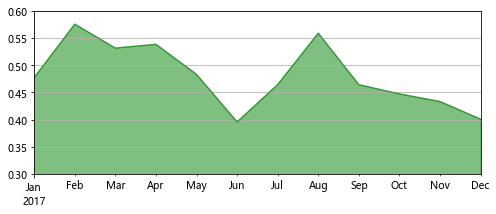

In [46]:
# 2、相对数比较 → 相除
# （2）比例分析
# 在分组的基础上，将总体不同部分的指标数值进行对比，其相对指标一般称为“比例相对数”
# 比例相对数 = 总体中某一部分数值 / 总体中另一部分数值 → “基本建设投资额中工业、农业、教育投资的比例”、“男女比例”...

data = pd.DataFrame({'consumption':np.random.rand(12)*1000 + 2000,
                    'salary':np.random.rand(12)*500 + 5000},
                   index = pd.period_range('2017/1','2017/12',freq = 'M'))
print(data.head())
print('--------------------------')
# 创建数据 → 某人一年内的消费、工资薪水情况
# 消费按照2000-3000/月随机，工资按照5000-5500/月随机

data['c_s'] = data['consumption'] / data['salary']
print(data.head())
# 比例相对数 → 消费收入比

data['c_s'].plot.area(color = 'green',alpha = 0.5,ylim = [0.3,0.6],figsize=(8,3),grid=True)
# 创建面积图表达

A            B            C           D
2017-06-01  3912.244177  1365.355096   552.113477  638.329381
2017-06-02  1727.278721  1385.811978  1767.864913   10.949905
2017-06-03   553.668188  1323.841279  6082.223097  573.519577
2017-06-04  4790.503919  1862.017346    44.507245  378.757070
2017-06-05  1245.093347  1440.571134  3831.645516  311.303459
------


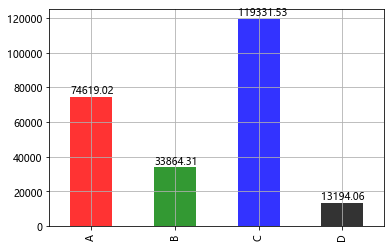

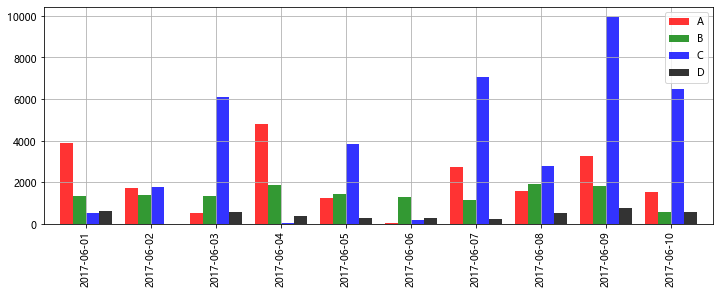

In [47]:
# 2、相对数比较 → 相除
# （3）空间比较分析（横向对比分析）
# 同类现象在同一时间不同空间的指标数值进行对比，反应同类现象在不同空间上的差异程度和现象发展不平衡的状况
# 空间比较相对数 = 甲空间某一现象的数值 / 乙空间同类现象的数值
# 一个很现实的例子 → 绝对数来看，我国多经济总量世界第一，但从人均水平来看是另一回事

data = pd.DataFrame({'A':np.random.rand(30)*5000,
                    'B':np.random.rand(30)*2000,
                    'C':np.random.rand(30)*10000,
                    'D':np.random.rand(30)*800},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('------------------')
# 创建数据 → 30天内A/B/C/D四个产品的销售情况
# 不同产品的销售量级不同

# 通过柱状图做横向比较 → 4个产品的销售额总量
data.sum().plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j, color = 'k')

# 多系列柱状图，横向比较前十天4个产品的销售额
data[:10].plot(kind = 'bar',color = ['r','g','b','k'], alpha = 0.8, grid = True, figsize = (12,4),width = 0.8)

# 关于同比与环比
# 同比 → 产品A在2015.3和2016.3的比较（相邻时间段的同一时间点）
# 环比 → 产品A在2015.3和2015.4的比较（相邻时间段的比较）
# 如何界定“相邻时间段”与“时间点”，决定了是同比还是环比

A
2017-06-01  1478.293184
2017-06-02  1910.192983
2017-06-03  2631.007217
2017-06-04  2580.335966
2017-06-05  2121.365777
---------------------
                      A  base     l_growth    z_growth    lspeed    zspeed
2017-06-01  1478.293184  1000   478.293184    0.000000  0.478293       NaN
2017-06-02  1910.192983  1000   910.192983  431.899799  0.910193  0.292161
2017-06-03  2631.007217  1000  1631.007217  720.814234  1.631007  0.377352
2017-06-04  2580.335966  1000  1580.335966  -50.671251  1.580336 -0.019259
2017-06-05  2121.365777  1000  1121.365777 -458.970189  1.121366 -0.177872
------------------


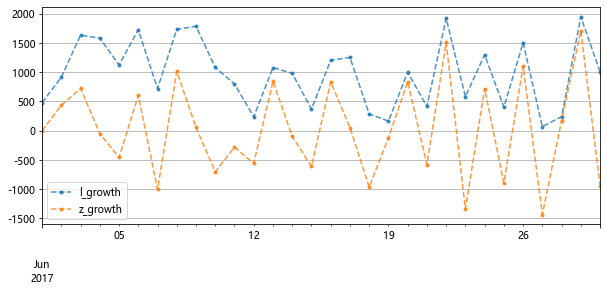

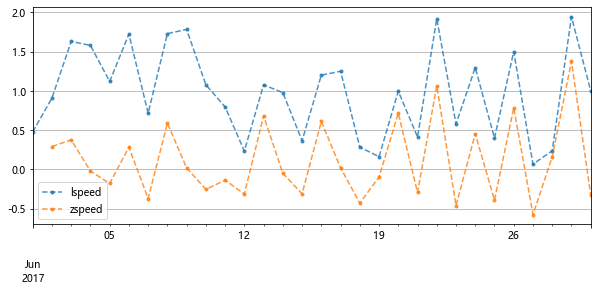

In [48]:
# 2、相对数比较 → 相除
# （4）动态对比分析（纵向对比分析）
# 同一现象在不同时间上的指标数值进行对比，反应现象的数量随着时间推移而发展变动的程度及趋势
# 最基本方法，计算动态相对数 → 发展速度
# 动态相对数（发展速度） = 某一现象的报告期数值 / 同一现象的基期数值
# 基期：用来比较的基础时期
# 报告期：所要研究的时期，又称计算期

# 创建数据 → 30天内A产品的销售情况
data = pd.DataFrame({'A':np.random.rand(30)*2000+1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('---------------------')

data['base'] = 1000  # 假设基期销售额为1000，后面每一天都为计算期
data['l_growth'] = data['A'] - data['base']  # 增长量 = 报告期水平 - 固定基期水平
data['z_growth'] = data['A'] - data.shift(1)['A']  # 逐期增长量 = 报告期水平 - 报告期前一期水平 (data.shift(下移1)
data[data.isnull()] = 0  # 替换缺失值

# 通过折线图查看增长量情况
data[['l_growth','z_growth']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  
plt.legend(loc = 'lower left')
plt.grid()

# 通过折线图查看发展速度
data['lspeed'] = data['l_growth'] / data['base']  # 定基增长速度
data['zspeed'] = data['z_growth'] / data.shift(1)['A']  # 环比增长速度
data[['lspeed','zspeed']].plot(figsize = (10,4),style = '--.',alpha = 0.8)  

plt.grid()
print(data.head())
print('------------------')

### 统计分析
统计指标对定量数据进行统计描述，常从集中趋势和离中趋势两个方面进行分析

集中趋势度量 / 离中趋势度量

In [51]:
# 1、集中趋势度量
# 指一组数据向某一中心靠拢的倾向，核心在于寻找数据的代表值或中心值 —— 统计平均数
# 算数平均数、位置平均数
# （1）算数平均数

data = pd.DataFrame({'value':np.random.randint(100,120,100),
                    'f':np.random.rand(100)})
data['f'] = data['f'] / data['f'].sum()  # f为权重，这里将f列设置成总和为1的权重占比
print(data.head())
print('-------------------')
# 创建数据

mean = data['value'].mean()
print('简单算数平均值为：%.2f' % mean)
# 简单算数平均值 = 总和 / 样本数量 （不涉及权重）

mean_w = (data['value'] * data['f']).sum() / data['f'].sum()
print('加权算数平均值为：%.2f' % mean_w)
# 加权算数平均值 = (x1f1 + x2f2 + ... + xnfn) / (f1 + f2 + ... + fn)

value         f
0    102  0.014869
1    119  0.005393
2    114  0.011253
3    111  0.016747
4    107  0.006358
-------------------
简单算数平均值为：109.57
加权算数平均值为：109.42


众数为 [102]
中位数为110


Text(114.57, 0.015, '中位数：110')

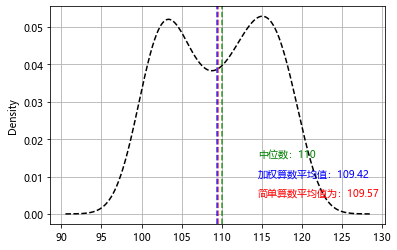

In [52]:
# 1、集中趋势度量
# （2）位置平均数

m = data['value'].mode()
# 众数是一组数据中出现次数最多的数，这里可能返回多个值
print('众数为',m.tolist())

med = data['value'].median()
# 中位数指将总体各单位标志按照大小顺序排列后，中间位置的数字
print('中位数为%i' % med)

# 密度曲线(kde 概率密度)
data['value'].plot(kind = 'kde',style = '--k',grid = True)

# 简单算数平均值 axvline 画垂直坐标轴线
plt.axvline(mean,color='r',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.005,'简单算数平均值为：%.2f' % mean, color = 'r')

# 加权算数平均值
plt.axvline(mean_w,color='b',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.01,'加权算数平均值：%.2f' % mean_w, color = 'b')

# 中位数
plt.axvline(med,color='g',linestyle="--",alpha=0.8)  
plt.text(mean + 5,0.015,'中位数：%i' % med, color = 'g')
# **这里三个数text显示的横坐标一致，目的是图示效果不拥挤

A_sale      B_sale
2017-06-01  361.111475   70.175174
2017-06-02   32.106047  613.597962
2017-06-03   79.687453  890.796816
2017-06-04  580.949100  683.885153
2017-06-05  991.683105  146.741397
---------------------------------
A销售额的极差为：959.58, B销售额的极差为：926.51
------------------------------------------
A销售额的分位差为：407.21, B销售额的分位差为：480.63
-------------------------------------


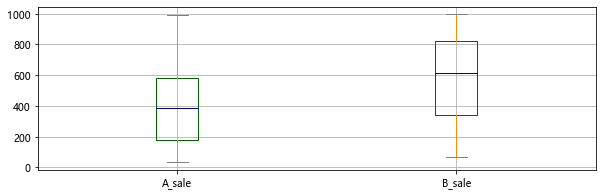

In [57]:

# 2、离中趋势度量
# 指一组数据中各数据以不同程度的距离偏离中心的趋势
# 极差与分位差、方差与标准差、离散系数

# A/B销售额量级在同一水平
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                    'B_sale':np.random.rand(30)*1000},
                   index = pd.period_range('20170601','20170630'))
print(data.head())
print('---------------------------------')

# 极差
# 没有考虑中间变量的变动，测定离中趋势不稳定
a_r = data['A_sale'].max() - data['A_sale'].min()
b_r = data['B_sale'].max() - data['B_sale'].min()
print('A销售额的极差为：%.2f, B销售额的极差为：%.2f' % (a_r,b_r))
print('------------------------------------------')

# %75分位差
sta = data['A_sale'].describe()
stb = data['B_sale'].describe()

a_iqr = sta.loc['75%'] - sta.loc['25%']
b_iqr = stb.loc['75%'] - stb.loc['25%']
print('A销售额的分位差为：%.2f, B销售额的分位差为：%.2f' % (a_iqr,b_iqr))
print('-------------------------------------')

# 箱型图
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(grid = True,color = color,figsize = (10,3))

A销售额的标准差为：263.12, B销售额的标准差为：295.27
A销售额的方差为：69230.36, B销售额的方差为：87182.28


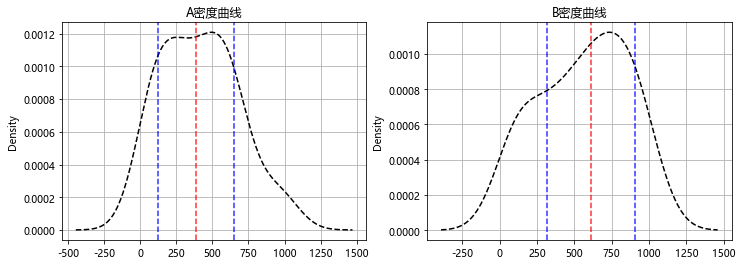

In [58]:
# 2、离中趋势度量
# （2）方差与标准差

# 方差 → 各组中数值与算数平均数离差平方的算术平均数
# 标准差 → 方差的平方根
# 标准差是最常用的离中趋势指标 → 标准差越大，离中趋势越明显
a_std = sta.loc['std']
b_std = stb.loc['std']
a_var = data['A_sale'].var()
b_var = data['B_sale'].var()
print('A销售额的标准差为：%.2f, B销售额的标准差为：%.2f' % (a_std,b_std))
print('A销售额的方差为：%.2f, B销售额的方差为：%.2f' % (a_var,b_var))

# A密度曲线，1个标准差
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
data['A_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'A密度曲线')
plt.axvline(sta.loc['50%'],color='r',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] - a_std,color='b',linestyle="--",alpha=0.8)  
plt.axvline(sta.loc['50%'] + a_std,color='b',linestyle="--",alpha=0.8)  

# B密度曲线，1个标准差
ax2 = fig.add_subplot(1,2,2)
data['B_sale'].plot(kind = 'kde',style = 'k--',grid = True,title = 'B密度曲线')
plt.axvline(stb.loc['50%'],color='r',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] - b_std,color='b',linestyle="--",alpha=0.8)  
plt.axvline(stb.loc['50%'] + b_std,color='b',linestyle="--",alpha=0.8)  

### 如何归一化和标准化
#### min-max(0-1) 标准化

min-max标准化(Min-max normalization) / 0-1标准化(0-1 normalization) / 线性函数归一化 / 离差标准化这些名字都是一样的原理。是对原始数据的线性变换，使结果落到[0,1]区间，转换函数如下：
，其中max为样本数据的最大值，min为样本数据的最小值，x为实际输入值，x*为标准化后的值。
这种方法适用于max,min比较稳定的情况下使用，意思也就是说x∈[max, min]的情况。因为当x>max或x<min时，对应的分母值就已经变化了。
在实际上，可以通过人为的定义各个维度的数值的max和min使用。通过设置比原来数据集大一点的max和小一点的min对输入数据进行兼容。

#### z-score(标准差) 标准化

z-score 标准化也叫标准差标准化，这种方法给予原始数据的均值（mean）和标准差（standard deviation）进行数据的标准化。
经过处理的数据符合标准正态分布，即均值为0，标准差为1，其转化函数为：

x* = (x - μ ) / σ

其中μ为所有样本数据的均值，σ为所有样本数据的标准差。
z-score标准化方法适用于属性A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。该种归一化方式要求原始数据的分布可以近似为高斯分布(正态分布)，否则归一化的效果会变得很糟糕。在分类、聚类算法中，需要使用距离来度量相似性的时候、或者使用PCA技术进行降维的时候，Z-score standardization表现更好。

标准化的公式很简单，步骤如下

1.求出各变量（指标）的算术平均值（数学期望）μ和标准差σ ；
2.进行标准化处理：

x* = (x - μ ) / σ

其中：x*为标准化后的变量值；x为实际变量值。
3.将逆指标前的正负号对调。
标准化后的变量值围绕0上下波动，大于0说明高于平均水平，小于0说明低于平均水平。
#### nonlinearity(非线性) 归一化

非线性归一化方法经常用在数据分化比较大的场景，有些数值很大，有些很小。通过一些数学函数，将原始值进行映射。
该方法包括 log，正切等，需要根据数据分布的情况，决定非线性函数的曲线：

    log对数函数转换方法
    y = log10(x)，即以10为底的对数转换函数，对应的归一化方法为：x*= log10(x) /log10(max)，其中max表示样本数据的最大值，x’为标准化后值，x为输入值，并且所有样本数据均要大于等于1.
    arctan反正切函数转换方法
    利用反正切函数可以实现数据的归一化，即
    x*= arctan(x)*(2/pi)
    使用这个方法需要注意的是如果想映射的区间为[0，1]，则数据都应该大于等于0，小于0的数据将被映射到[－1，0]区间上.
    L2范数归一化方法
    L2范数归一化就是特征向量中每个元素均除以向量的L2范数：

### 帕累托分析
帕累托分析（贡献度分析） → 帕累托法则：20/80定律

“原因和结果、投入和产出、努力和报酬之间本来存在着无法解释的不平衡。一般来说，投入和努力可以分为两种不同的类型： 多数，它们只能造成少许的影响；少数，它们造成主要的、重大的影响。” → 一个公司，80%利润来自于20%的畅销产品，而其他80%的产品只产生了20%的利润

例如：

世界上大约80％的资源是由世界上15％的人口所耗尽的
世界财富的80％为25％的人所拥有；在一个国家的医疗体系中
20％的人口与20％的疾病，会消耗80％的医疗资源
一个思路：通过二八原则，去寻找关键的那20%决定性因素！

A    3488.835777
B    1799.179772
C      67.161385
D    4017.851480
E    2338.369752
F    2822.783682
G    1691.121517
H    2540.825241
I    4113.380149
J    1848.032524
dtype: float64
------------------------
超过80%累计占比的节点值索引为： J
超过80%累计占比的节点值索引位置为： 6
------
核心产品为：
I    4113.380149
D    4017.851480
A    3488.835777
F    2822.783682
H    2540.825241
E    2338.369752
J    1848.032524
dtype: float64


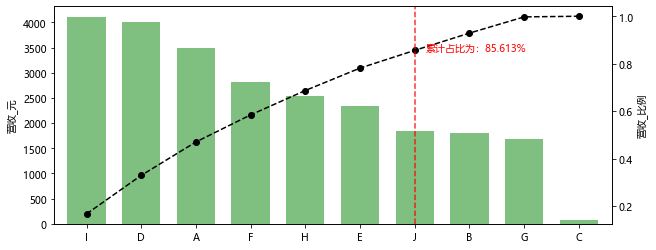

In [59]:
# 帕累托分布分析 

# 创建数据，10个品类产品的销售额
data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------------------------')

# 由大到小排列
data.sort_values(ascending=False, inplace= True)

# 创建营收柱状图
plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('营收_元')

# 找到累计占比超过80%时候的index
# 找到key所对应的索引位置
p = data.cumsum()/data.sum()  #(cumsum 方法累加) 创建累计占比，Series
key = p[p>0.8].index[0]  # 找到%80的点
key_num = data.index.tolist().index(key) 
print('超过80%累计占比的节点值索引为：' ,key)
print('超过80%累计占比的节点值索引位置为：' ,key_num)
print('------------------------')

# 绘制营收累计占比曲线
p.plot(style = '--ko', secondary_y=True)  # secondary_y → y副坐标轴
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'累计占比为：%.3f%%' % (p[key]*100), color = 'r')  # 累计占比超过80%的节点
plt.ylabel('营收_比例')

# 输出决定性因素产品
key_product = data.loc[:key]
print('核心产品为：')
print(key_product)

### 正态性检验
利用观测数据判断总体是否服从正态分布的检验称为正态性检验，它是统计判决中重要的一种特殊的拟合优度假设检验。

直方图初判 / QQ图判断 / K-S检验

value
0  10.509254
1  11.726250
2   8.690719
3   9.327500
4  11.056802


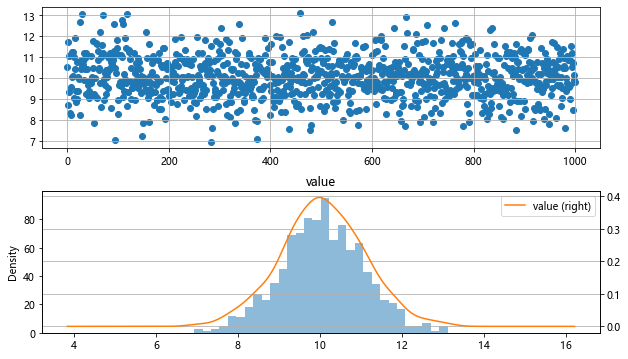

In [60]:
# 直方图初判

# 创建随机数据 np.random.randn,随机产生标准正太分布数据
s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())

# 绘制数据散点分布图
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()

# 绘制直方图
ax2 = fig.add_subplot(2,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
# 呈现较明显的正太性
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

value
0  10.387028
1  10.203623
2   9.824116
3   8.877508
4  10.014999
均值为：9.96，标准差为：0.97
------------------
   index     value       p         q
0    683  7.250118 -0.0005 -2.804554
1    473  7.254794  0.0005 -2.799718
2    991  7.284135  0.0015 -2.769378
3    851  7.296125  0.0025 -2.756979
4    734  7.379347  0.0035 -2.670920
--------------------------
四分之一位数为：9.32，四分之三位数为：10.61
-------------------------------


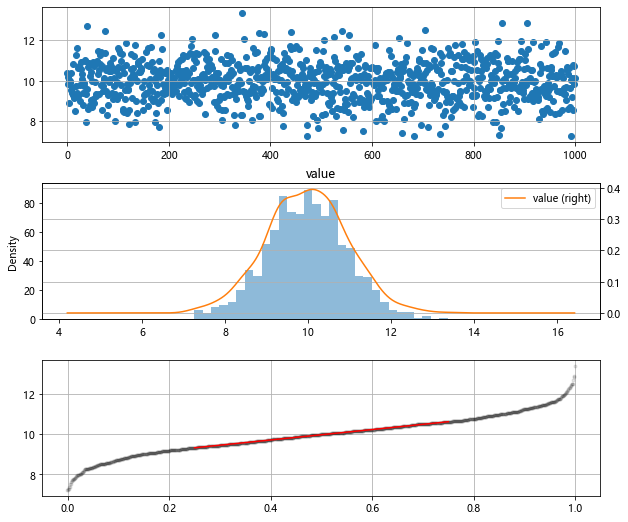

In [61]:
# QQ图判断
# QQPlot图是用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。在教学和软件中常用的是检验数据是否来自于正态分布。QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n，这里p(i)有很多种算法，有的定义为i/(n+1)等等，则x(i)对应的理论分位点为F^(-1)(p(i))=F^(-1)((i-0.5)/n)，这也就是横坐标的值
# ③ 绘制直方图 + qq图，直方图作为参考

s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

#  计算均值，标准差
mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------------------')

s.sort_values(by = 'value', inplace = True)  # 重新排序
# 计算百分位数 p(i)
# 计算q值
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
s_r['p'] = (s_r.index - 0.5) / len(s_r)  #p(i)=(i-0.5)/n
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('--------------------------')

# 计算四分之一位数、四分之三位数
st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('-------------------------------')

# 绘制数据分布图
fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()

# 绘制直方图
ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

# 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布
ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()

样本均值为：79.74，样本标准差为：5.94
------
实际观测D值为：0.1597


,血糖浓度,次数,累计次数,累计频率,标准化取值,理论分布,D
0,68,2,2,0.057143,-1.977701,0.0244,0.032743
1,72,2,4,0.114286,-1.304031,0.0968,0.017486
2,75,2,6,0.171429,-0.798779,0.2148,0.043371
3,76,2,8,0.228571,-0.630362,0.2643,0.035729
4,77,6,14,0.400000,-0.461945,0.3228,0.077200
5,78,3,17,0.485714,-0.293527,0.3859,0.099814
6,80,6,23,0.657143,0.043307,0.5160,0.141143
7,81,3,26,0.742857,0.211725,0.5832,0.159657
8,84,2,28,0.800000,0.716977,0.7611,0.038900
9,86,2,30,0.857143,1.053811,0.8531,0.004043


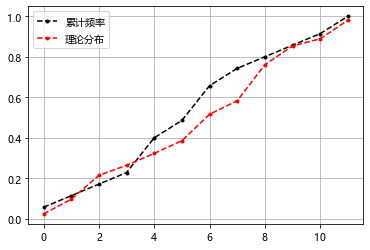

In [62]:
# KS检验，理论推导

# 样本数据，35位健康男性在未进食之前的血糖浓度
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]

# 查看数据基本统计量
df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()
std = df['value'].std()
print("样本均值为：%.2f，样本标准差为：%.2f" % (u,std))
print('---------------------')

# 创建频率数据
s = df['value'].value_counts().sort_index()
df_s = pd.DataFrame({'血糖浓度':s.index,'次数':s.values})

 # 通过查阅正太分布表
df_s['理论分布'] =[0.0244,0.0968,0.2148,0.2643,0.3228,0.3859,0.5160,0.5832,0.7611,0.8531,0.8888,0.9803] 
df_s['累计次数'] = df_s['次数'].cumsum()
df_s['累计频率'] = df_s['累计次数'] / len(data)
df_s['标准化取值'] = (df_s['血糖浓度'] - u) / std
# D值序列计算结果表格
df_s['D'] = np.abs(df_s['累计频率'] - df_s['理论分布'])
dmax = df_s['D'].max()
print("实际观测D值为：%.4f" % dmax)

# 密度图表示
df_s['累计频率'].plot(style = '--k.')
df_s['理论分布'].plot(style = '--r.')
plt.legend(loc = 'upper left')
plt.grid()


In [63]:
# 直接用算法做KS检验
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算
from scipy import stats

# 样本数据，35位健康男性在未进食之前的血糖浓度
data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]

# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布
df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))


KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

### 相关性分析
分析连续变量之间的线性相关程度的强弱

图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）

> 统计学三大相关系数

1. 皮尔森相关描述两个变量之间的线性相关
x,y 为两个变量。
公式: >(ρX,Y)=cov(X,Y)/σX*σY

适用条件：
```
1. 两个变量都是连续变量
2.  每个变量都应该是 正态分布，或者接近正态分布的单峰对称分布
3. 变量之间应该为线性关系
```
2. 斯皮尔曼 相关

斯皮尔曼相关性系数，通常也叫斯皮尔曼秩相关系数。“秩”，可以理解成就是一种顺序或者排序，那么它就是根据原始数据的排序位置进行求解，这种表征形式就没有了求皮尔森相关性系数时那些限制。下面来看一下它的计算公式：

Ps = 1- 6∑di^2/n*(n^2-1)


3.肯德尔相关性系数
 肯德尔相关性系数，又称肯德尔秩相关系数，它也是一种秩相关系数，不过它所计算的对象是分类变量。 
    分类变量可以理解成有类别的变量，可以分为：
    (1) 无序的，比如性别（男、女）、血型（A、B、O、AB）； 
    (2) 有序的，比如肥胖等级（重度肥胖，中度肥胖、轻度肥胖、不肥胖）。 
    通常需要求相关性系数的都是有序分类变量。
    
R=（P-(n*(n-1)/2-P))/(n*(n-1)/2)=(4P/(n*(n-1)))-1

注：设有n个统计对象，每个对象有两个属性。将所有统计对象按属性1取值排列，不失一般性，设此时属性2取值的排列是乱序的。设P为两个属性值排列大小关系一致的统计对象对数


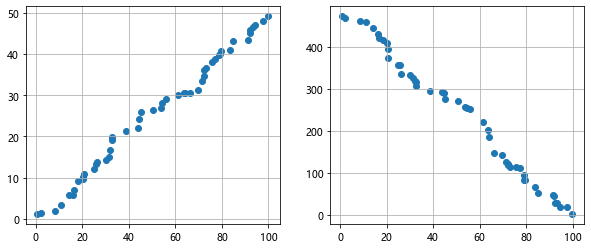

In [64]:
# 图示初判
# （1）变量之间的线性相关性

# 创建三个数据：data1为0-100的随机数并从小到大排列，data2为0-50的随机数并从小到大排列，data3为0-500的随机数并从大到小排列，
data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关

,A,B,C,D
0,141.505008,-134.575011,172.112975,90.723560
1,-66.466167,-12.228983,-116.004314,62.882076
2,50.735348,132.529844,55.882604,-140.579080
3,60.263161,42.790151,88.016644,-8.880264
4,56.991393,-50.834051,-242.063086,-151.500654


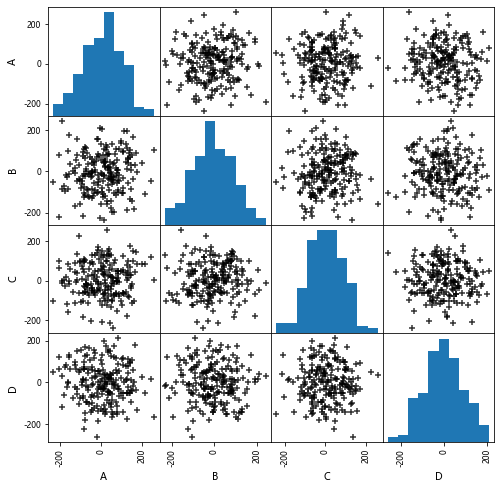

In [66]:
# （2）散点图矩阵初判多变量间关系

data = pd.DataFrame(np.random.randn(200,4)*100, columns = ['A','B','C','D'])
pd.plotting.scatter_matrix(data,figsize=(8,8),
                  c = 'k',
                 marker = '+',
                 diagonal='hist',
                 alpha = 0.8,
                 range_padding=0.1)
data.head()

In [68]:
# Pearson(皮尔逊)相关系数 

# 创建样本数据
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('----------------------')

# 正态性检验 → pvalue >0.05
u1,u2 = data['value1'].mean(),data['value2'].mean()  # 计算均值
std1,std2 = data['value1'].std(),data['value2'].std()  # 计算标准差
print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (u1, std1)))
print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (u2, std2)))
print('-----------------------------')

# 制作Pearson相关系数求值表
data['(x-u1)*(y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1)**2'] = (data['value1'] - u1)**2
data['(y-u2)**2'] = (data['value2'] - u2)**2
print(data.head())
print('----------------------------------------')

# 求出r
# |r| > 0.8 → 高度线性相关
r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)

value1    value2
0  0.306050  0.160846
1  0.441509  0.184036
2  0.623211  0.533493
3  1.014438  0.747968
4  1.071475  2.514672
----------------------
value1正态性检验：
 KstestResult(statistic=0.1081036860595801, pvalue=0.179556797444255)
value2正态性检验：
 KstestResult(statistic=0.06573692818255561, pvalue=0.7805108374111961)
-----------------------------
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (y-u2)**2
0  0.306050  0.160846    1187.785331  2404.928727  586.642746
1  0.441509  0.184036    1183.370318  2391.661259  585.519920
2  0.623211  0.533493    1161.947012  2373.922068  568.730067
3  1.014438  0.747968    1142.251073  2335.951707  558.546441
4  1.071475  2.514672    1055.616072  2330.441558  478.160582
----------------------------------------
Pearson相关系数为：0.9931


In [70]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('---------------------')
# 创建样本数据

# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson
data.corr()

value1    value2
0  0.001897  1.726651
1  0.255712  1.832167
2  2.088586  2.734749
3  3.052334  2.760957
4  3.118655  4.289911
---------------------


,value1,value2
value1,1.000000,0.975164
value2,0.975164,1.000000


In [71]:
# Sperman秩相关系数
# 首先对两个变量（X, Y）的数据进行排序，然后记下排序以后的位置（X’, Y’），（X’, Y’）的值就称为秩次，秩次的差值就是上面公式中的di，n就是变量中数据的个数，最后带入公式
# 创建样本数据
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('----------------------------')

# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index
# 又斯皮尔曼相定义要取得x,y 排列顺序
data.sort_values('智商', inplace=True)
# 智商位置顺序
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
#每周看电视小时数
data['range2'] = np.arange(1,len(data)+1)
print(data)
print('-----------------------------')

# 求出di，di2
data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
print(data)
print('------------------------------')

# 求出rs
n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))
print('Pearson相关系数为：%.4f' % rs)

智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
----------------------------
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10
-----------------------------
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3

In [73]:
# Pearson相关系数 - 算法
#直接调用方法
# 创建样本数据
data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('---------------------')

# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson
data.corr(method='spearman')

智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
---------------------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000


In [74]:
#  3. kendall correlation coefficient（肯德尔相关性系数）

#原始数据 设P为两个属性值排列大小关系一致的统计对象对数
x= pd.Series([3,1,2,2,1,3])
y= pd.Series([1,2,3,2,1,1])
data  = pd.DataFrame({'val1':x,'val2':y})
# R=（P-(n*(n-1)/2-P))/(n*(n-1)/2)=(4P/(n*(n-1)))-1
data.corr(method='kendall')

,val1,val2
val1,1.000000,-0.261116
val2,-0.261116,1.000000
